In [26]:
import time
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('dark_background')
%matplotlib inline
import functools as fs

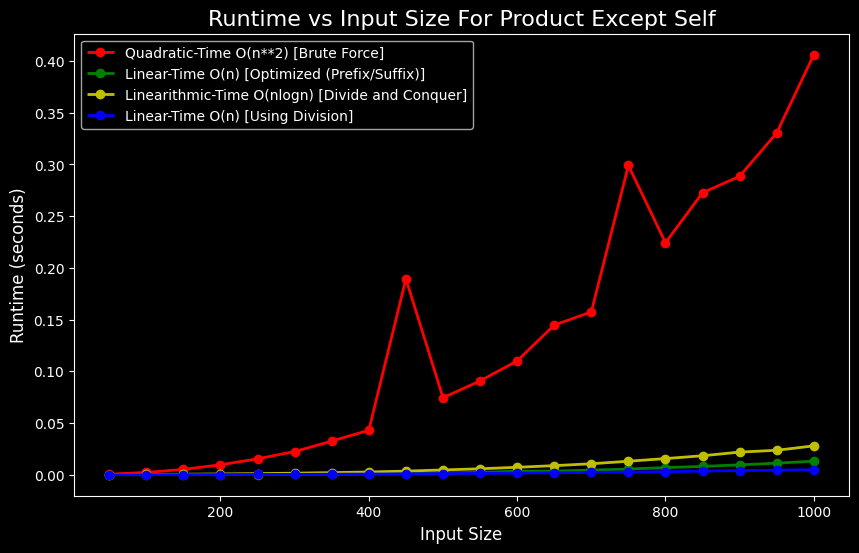

In [27]:
class Solution:
    def productExceptSelf1(self, nums: list[int]) -> list[int]:
        productArray: list = []
        for x in range(len(nums)):
            remAray: list = []
            for y in range(len(nums)):
                if x == y:
                    continue
                else:
                    remAray.append(nums[y])
            productArray.append(fs.reduce(lambda x, y: x * y, remAray))
        return productArray

    def productExceptSelf2(self, nums: list[int]) -> list[int]:
        n = len(nums)
        result = [1] * n  # Initialize the result array with 1s

        # Calculate prefix products
        prefix = 1
        for i in range(n):
            result[i] = prefix
            prefix *= nums[i]

        # Calculate suffix products and update the result
        suffix = 1
        for i in range(n - 1, -1, -1):
            result[i] *= suffix
            suffix *= nums[i]

        return result

    def productExceptSelf3(self, nums: list[int]) -> list[int]:
        def divide_and_conquer(nums, start, end):
            # Base case: if there's only one element, return its exclusion product as 1
            if start == end:
                return [1]

            # Divide: Split the array into two halves
            mid = (start + end) // 2
            left = divide_and_conquer(nums, start, mid)
            right = divide_and_conquer(nums, mid + 1, end)

            # Calculate total product for left and right halves
            left_product = 1
            for i in range(start, mid + 1):
                left_product *= nums[i]

            right_product = 1
            for i in range(mid + 1, end + 1):
                right_product *= nums[i]

            # Merge: Combine results from left and right
            result = [0] * (end - start + 1)
            for i in range(mid - start + 1):  # Elements in the left half
                result[i] = left[i] * right_product
            for i in range(mid - start + 1, end - start + 1):  # Elements in the right half
                result[i] = right[i - (mid - start + 1)] * left_product

            return result

        return divide_and_conquer(nums, 0, len(nums) - 1)

    def productExceptSelf4(self, nums: list[int]) -> list[int]:
        # Calculate the total product of all elements in the array
        total_product = 1
        zero_count = 0

        for num in nums:
            if num != 0:
                total_product *= num
            else:
                zero_count += 1

        # If more than one zero is present, all products will be zero
        if zero_count > 1:
            return [0] * len(nums)

        # Generate the result array
        result = []
        for num in nums:
            if zero_count == 0:
                # If no zero, divide total_product by the current number
                result.append(total_product // num)
            else:
                # If one zero, only the position of zero will have non-zero product
                if num == 0:
                    result.append(total_product)
                else:
                    result.append(0)

        return result


def measure_runtime():
    input_sizes = [50,  100, 150, 200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]  # Different input sizes
    runtimes1 = []
    runtimes2 = []
    runtimes3 = []
    runtimes4 = []

    for size in input_sizes:
        nums = list(range(1, size + 1))
        solution = Solution()
        start_time = time.time()
        solution.productExceptSelf1(nums)
        end_time = time.time()
        runtimes1.append(end_time - start_time)

    for size in input_sizes:
        nums = list(range(1, size + 1))
        solution = Solution()
        start_time = time.time()
        solution.productExceptSelf2(nums)
        end_time = time.time()
        runtimes2.append(end_time - start_time)

    for size in input_sizes:
        nums = list(range(1, size + 1))
        solution = Solution()
        start_time = time.time()
        solution.productExceptSelf3(nums)
        end_time = time.time()
        runtimes3.append(end_time - start_time)

    for size in input_sizes:
        nums = list(range(1, size + 1))
        solution = Solution()
        start_time = time.time()
        solution.productExceptSelf4(nums)
        end_time = time.time()
        runtimes4.append(end_time - start_time)


    return input_sizes, runtimes1, runtimes2, runtimes3, runtimes4

def plot_graph(input_sizes, runtimes1,runtimes2,runtimes3,runtimes4):
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, runtimes1, marker='o', linestyle='-', color='r',label = 'Quadratic-Time O(n**2) [Brute Force]')
    plt.plot(input_sizes, runtimes2, marker='o', linestyle='-', color='g',label = 'Linear-Time O(n) [Optimized (Prefix/Suffix)]')
    plt.plot(input_sizes, runtimes3, marker='o', linestyle='-', color='y',label = 'Linearithmic-Time O(nlogn) [Divide and Conquer]')
    plt.plot(input_sizes, runtimes4, marker='o', linestyle='-', color='b',label = 'Linear-Time O(n) [Using Division]')
    plt.title("Runtime vs Input Size For Product Except Self")
    plt.xlabel("Input Size")
    plt.ylabel("Runtime (seconds)")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == '__main__':
    input_sizes, runtimes1,runtimes2,runtimes3,runtimes4 = measure_runtime()
    plot_graph(input_sizes, runtimes1,runtimes2,runtimes3,runtimes4)